In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_heart = pd.read_csv("heart.csv")
df_heart.head()

,Age,Sex,CPType,RestBP,Chol,FastingBS,RestECG,Max.HR,EIAng,OldPeak,CA,ThalRate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1


In [3]:
df_heart.describe()

,Age,Sex,CPType,RestBP,Chol,FastingBS,RestECG,Max.HR,EIAng,OldPeak,CA,ThalRate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,3.000000,1.000000


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   CPType     303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   FastingBS  303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   Max.HR     303 non-null    int64  
 8   EIAng      303 non-null    int64  
 9   OldPeak    303 non-null    float64
 10  CA         303 non-null    int64  
 11  ThalRate   303 non-null    int64  
 12  output     303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


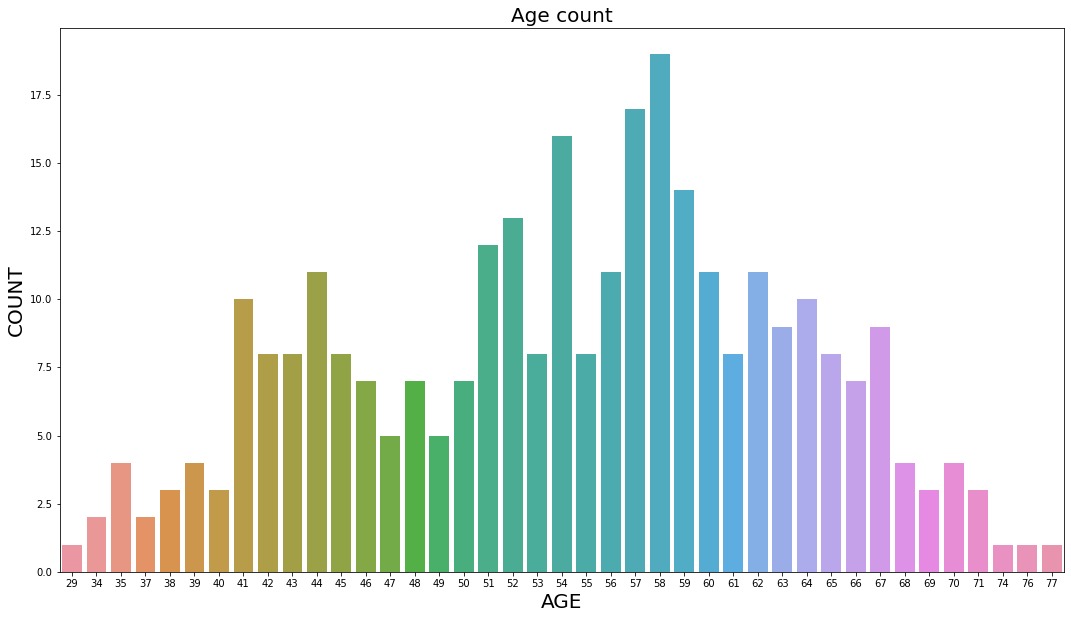

In [5]:
#Ploting the bar graph to visualize the age group

plt.figure(figsize=(18,10))


#using countplot, color of the graph is due to this
sns.countplot(x=df_heart["Age"])  

plt.title("Age count",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [7]:
df_heart['output'].value_counts().plot(kind='bar', rot = 0, color="maroon")
plt.title('Output Count')
plt.xlabel('Output')
plt.ylabel('Count')
#As per the bar chart : total Male patients are 207 & 96 are Female patients

1    165
0    138
Name: output, dtype: int64

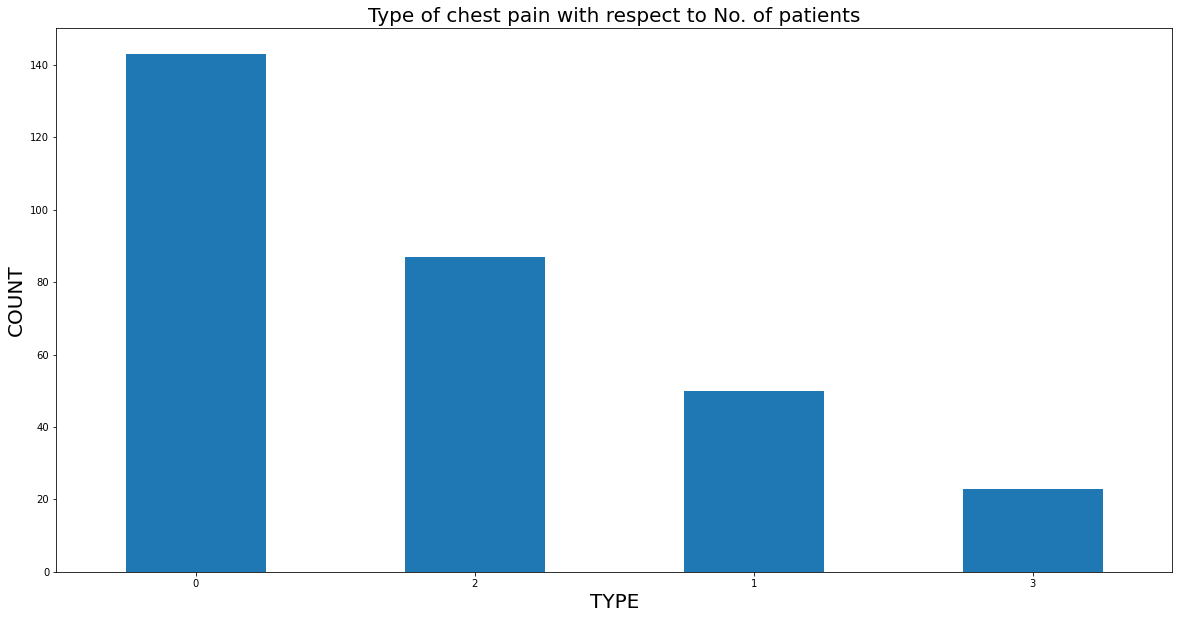

In [7]:
#plotting graph to identify the patient 

plt.figure(figsize=(20,10))
#plt.style.use("ggplot")
df_heart['CPType'].value_counts().plot(kind='bar', rot = 0)   #using bar here for visualization
plt.title("Type of chest pain with respect to No. of patients",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Cholestrol Value Distribution')

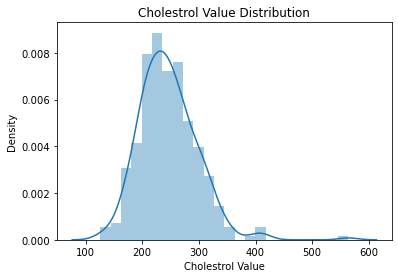

In [8]:
sns.distplot(df_heart['Chol'])
plt.xlabel("Cholestrol Value")
plt.title("Cholestrol Value Distribution")

Text(0.5, 0, 'Resting Blood Pressure')

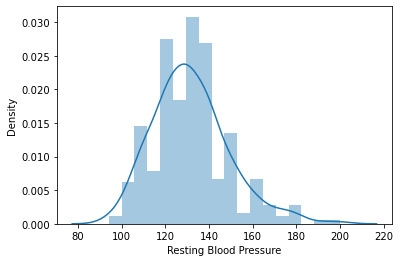

In [9]:
sns.distplot(df_heart['RestBP'])
plt.xlabel("Resting Blood Pressure")

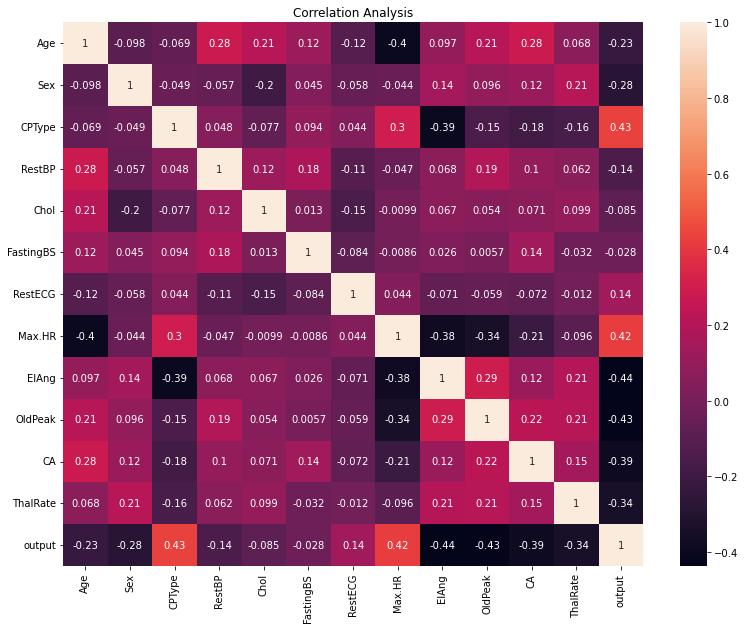

In [10]:
#Correlation Analysis (used to quantify the degree to which two variables are related.)
plt.figure(figsize = (13,10)) #13,10 -> width, height
sns.heatmap(df_heart.corr(), annot = True)
plt.title("Correlation Analysis")
plt.show()

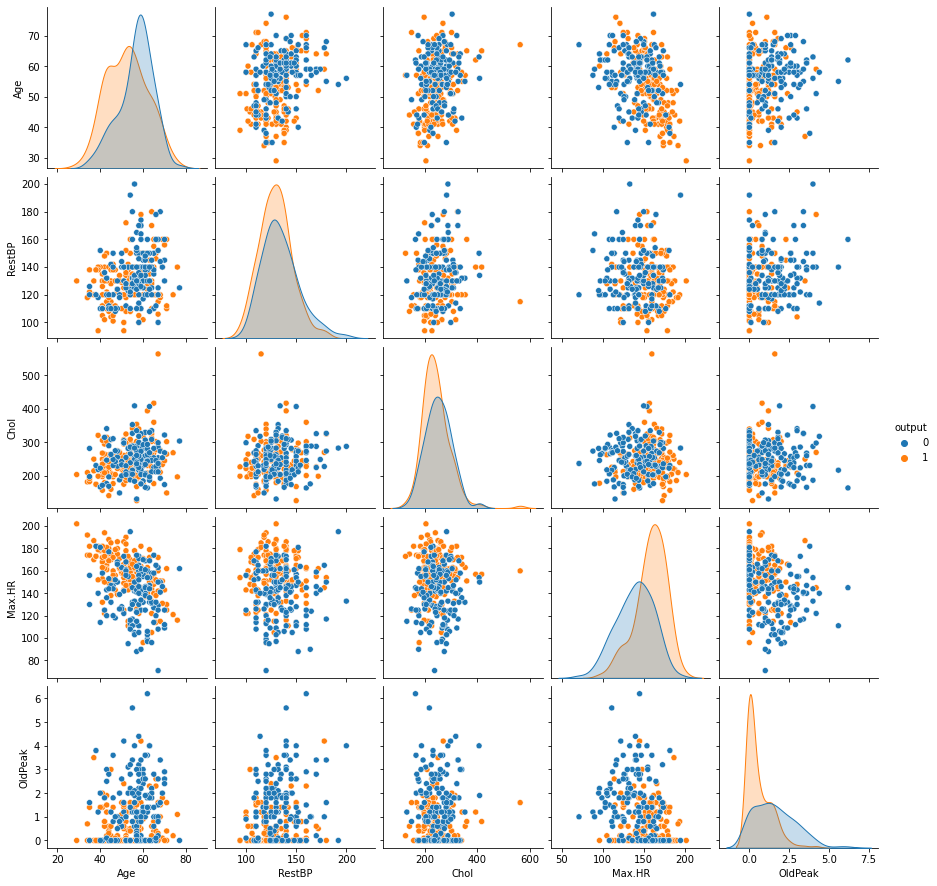

In [11]:
df2 = ["Age","RestBP","Chol","Max.HR","OldPeak","output"]
df_numeric = df_heart.loc[:, df2]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [12]:
#When you're doing machine learning you'll work with algorithms that cannot process categorical variables. In this case, you need to turn your column of labels (Ex: ['cat', 'dog', 'bird', 'cat']) into separate columns of 0s and 1s. This is called getting dummies pandas columns.

#Pandas pd.get_dummies() will turn your categorical column (column of labels) into indicator columns (columns of 0s and 1s).

#This function is heavily used within machine learning algorithms. For instance, random forrest doesn't do great with columns that have labels. It's best to turn these into dummy indicator columns.


In [13]:
#Selecting Features:
df1 = df_heart.copy()
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

In [14]:
#Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)
print(X_train.shape,X_test.shape,X.shape, y_train.shape, y_test.shape)

(242, 12) (61, 12) (303, 12) (242, 1) (61, 1)


In [15]:
#Pre-Processing
min_max_scalr = preprocessing.MinMaxScaler()
col = X.columns
airline_norm = min_max_scalr.fit_transform(X)
df_heart_norm = pd.DataFrame(airline_norm, columns=col)
df_heart_norm.head()

,Age,Sex,CPType,RestBP,Chol,FastingBS,RestECG,Max.HR,EIAng,OldPeak,CA,ThalRate
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.666667


In [59]:
##Perceptron Model
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
PerceptronScore = clf.score(X_test, y_test)
print(PerceptronScore)

0.639344262295082


In [60]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        31
           1       0.68      0.50      0.58        30

    accuracy                           0.64        61
   macro avg       0.65      0.64      0.63        61
weighted avg       0.65      0.64      0.63        61



In [61]:
print('Accuracy score is:',PerceptronScore)

Accuracy score is: 0.639344262295082


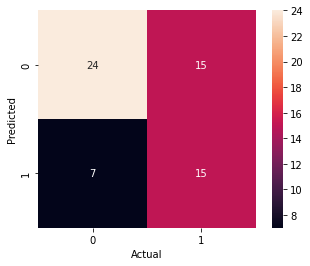

In [62]:
conf_mat = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(conf_mat.T, square=True, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [64]:
#Logistic Regression Model
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [65]:
lgr.predict(X_test)
lgr.predict_proba(X_test)
y_pred_lgr = lgr.predict(X_test)
LogisticScore = lgr.score(X_test, y_test)
print(LogisticScore)

0.8688524590163934


In [66]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



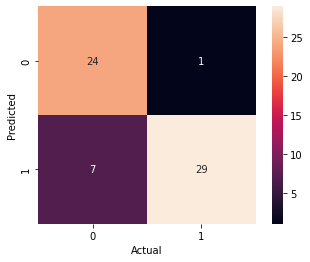

In [67]:
conf_mat = confusion_matrix(y_test, y_pred_lgr)
sns.heatmap(conf_mat.T, square=True, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [70]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.64      0.77      0.70        30

    accuracy                           0.67        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61



Text(0, 0.5, 'Model')

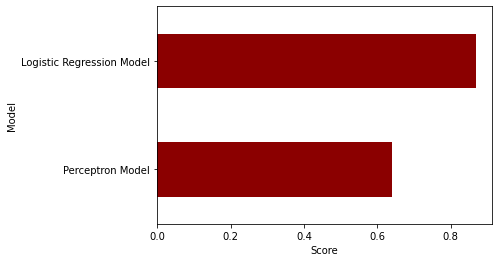

In [102]:
df_score = pd.DataFrame({
"Model": ['Perceptron Model', 'Logistic Regression Model'],
'Score': [PerceptronScore, LogisticScore]
})

df_score.plot(x="Model", color='darkred', kind='barh', legend=None)

plt.xlabel('Score')
plt.ylabel('Model')
